# BBC Dataset Profiling

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import nltk
import re

plt.style.use('ggplot')
sns.set_theme(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
bbc_df = pd.read_csv("_data/2_Medium_BBC_dataset/bbc_dataset_preprocessed.csv")
print(f"Df shape: {bbc_df.shape}")

Df shape: (2225, 5)


## 1. Basic Information

In [5]:
print("\n--- Basic Dataset Information ---")
print(bbc_df.info())
print("\nSample data:")
bbc_df.head()


--- Basic Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        2225 non-null   object
 1   category         2225 non-null   object
 2   text             2225 non-null   object
 3   cleaned_text     2225 non-null   object
 4   normalized_text  2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB
None

Sample data:


,file_name,category,text,cleaned_text,normalized_text
0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly pr...,ad sale boost time warner profit quarterli pro...
1,002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gains on greenspan speech the dollar ha...,dollar gain greenspan speech dollar hit highes...
2,003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer faces loan claim the owners o...,yuko unit buyer face loan claim owner embattl ...
3,004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,high fuel prices hit ba s profits british airw...,high fuel price hit ba profit british airway b...
4,005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lifts domecq shares in uk...,pernod takeov talk lift domecq share uk drink ...


## 2. Category Distribution


--- Category Distribution ---
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


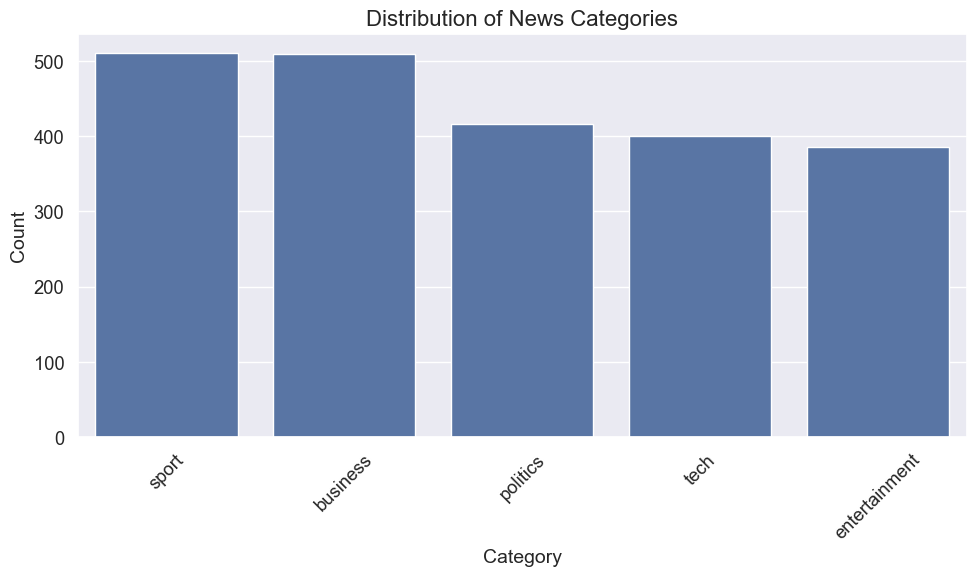

In [6]:
print("\n--- Category Distribution ---")
category_counts = bbc_df['category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of News Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Text Length Analysis


--- Text Length Analysis ---
Original text length statistics:
count     2225.000000
mean      2265.160449
std       1364.094764
min        503.000000
25%       1448.000000
50%       1967.000000
75%       2804.000000
max      25485.000000
Name: original_length, dtype: float64

Cleaned text length statistics:
count     2225.000000
mean      2178.273708
std       1321.890381
min        490.000000
25%       1383.000000
50%       1888.000000
75%       2714.000000
max      24809.000000
Name: cleaned_length, dtype: float64

Normalized text length statistics:
count     2225.000000
mean      1362.977079
std        780.584226
min        303.000000
25%        876.000000
50%       1189.000000
75%       1683.000000
max      14123.000000
Name: normalized_length, dtype: float64


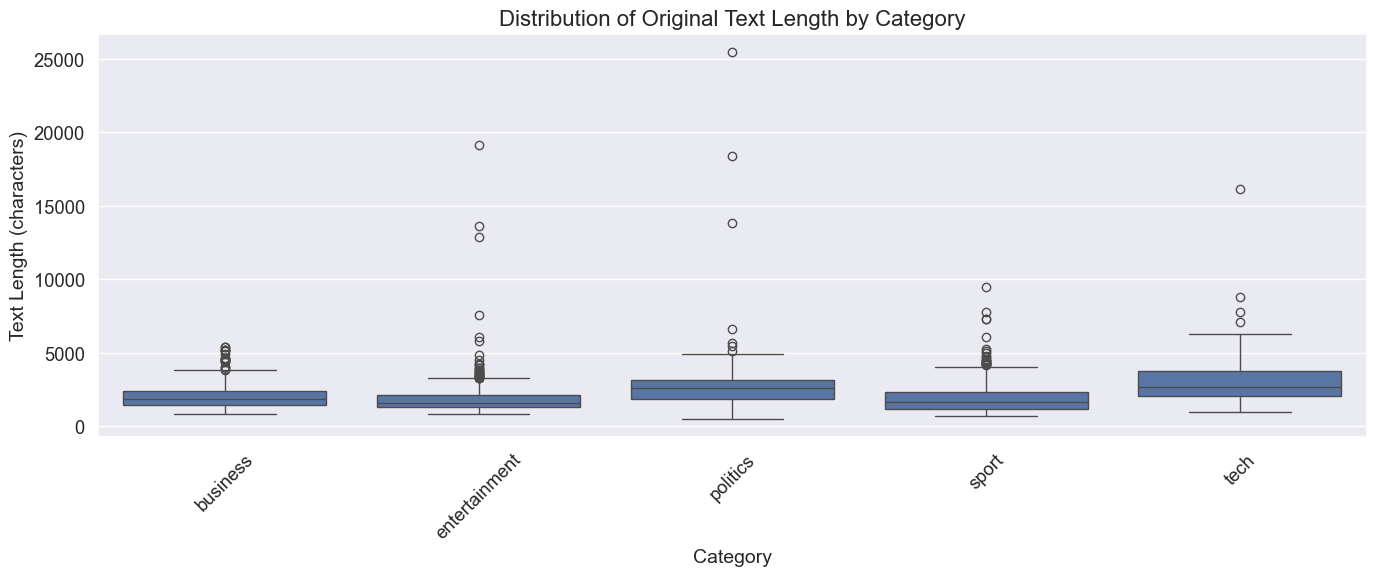

In [ ]:
print("\n--- Text Length Analysis ---")
bbc_df['original_length'] = bbc_df['text'].apply(len)
bbc_df['cleaned_length'] = bbc_df['cleaned_text'].apply(len)
bbc_df['normalized_length'] = bbc_df['normalized_text'].apply(len)

print("Original text length statistics:")
print(bbc_df['original_length'].describe())
print("\nCleaned text length statistics:")
print(bbc_df['cleaned_length'].describe())
print("\nNormalized text length statistics:")
print(bbc_df['normalized_length'].describe())

# Length distributions by category
plt.figure(figsize=(14, 6))
sns.boxplot(x='category', y='original_length', data=bbc_df)
plt.title('Distribution of Original Text Length by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Text Length (characters)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Word Count Analysis


--- Word Count Analysis ---
Word count statistics (original):
count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: word_count_original, dtype: float64

Word count statistics (cleaned):
count    2225.000000
mean      386.266067
std       240.370787
min        90.000000
25%       247.000000
50%       335.000000
75%       473.000000
max      4469.000000
Name: word_count_cleaned, dtype: float64

Word count statistics (normalized):
count    2225.000000
mean      218.463820
std       125.853363
min        48.000000
25%       141.000000
50%       191.000000
75%       270.000000
max      2198.000000
Name: word_count_normalized, dtype: float64


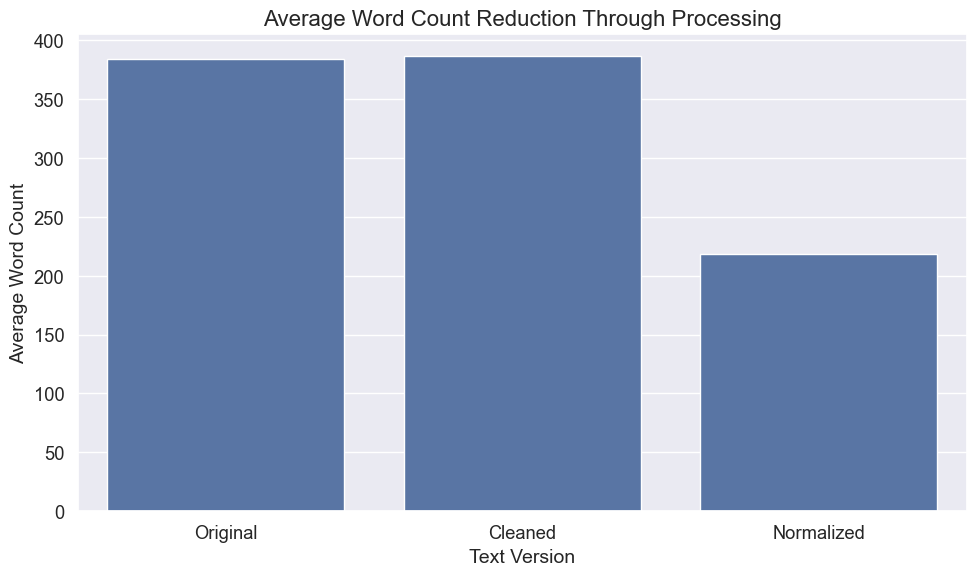

In [8]:
print("\n--- Word Count Analysis ---")
bbc_df['word_count_original'] = bbc_df['text'].apply(lambda x: len(x.split()))
bbc_df['word_count_cleaned'] = bbc_df['cleaned_text'].apply(lambda x: len(x.split()))
bbc_df['word_count_normalized'] = bbc_df['normalized_text'].apply(lambda x: len(x.split()))

print("Word count statistics (original):")
print(bbc_df['word_count_original'].describe())
print("\nWord count statistics (cleaned):")
print(bbc_df['word_count_cleaned'].describe())
print("\nWord count statistics (normalized):")
print(bbc_df['word_count_normalized'].describe())

# Word count reduction through processing
plt.figure(figsize=(10, 6))
data = [
    bbc_df['word_count_original'].mean(),
    bbc_df['word_count_cleaned'].mean(),
    bbc_df['word_count_normalized'].mean()
]
sns.barplot(x=['Original', 'Cleaned', 'Normalized'], y=data)
plt.title('Average Word Count Reduction Through Processing', fontsize=16)
plt.xlabel('Text Version', fontsize=14)
plt.ylabel('Average Word Count', fontsize=14)
plt.tight_layout()
plt.show()

## 5. Vocabulary Analysis


--- Vocabulary Analysis ---
Original vocabulary size: 65553
Cleaned vocabulary size: 27906
Normalized vocabulary size: 18997


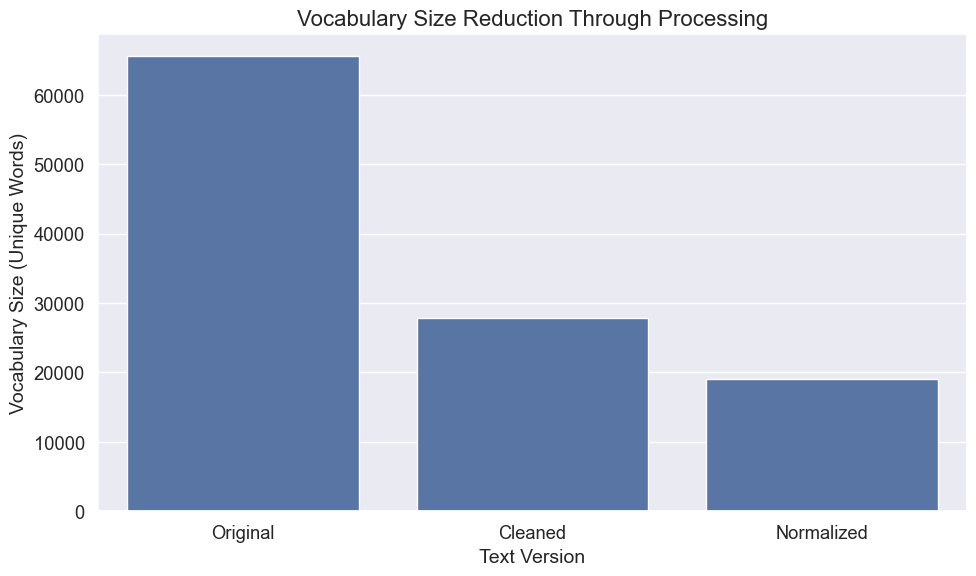

In [ ]:
print("\n--- Vocabulary Analysis ---")
def get_vocabulary_size(text_series):
    all_words = ' '.join(text_series).split()
    unique_words = set(all_words)
    return len(unique_words)

original_vocab_size = get_vocabulary_size(bbc_df['text'])
cleaned_vocab_size = get_vocabulary_size(bbc_df['cleaned_text'])
normalized_vocab_size = get_vocabulary_size(bbc_df['normalized_text'])

print(f"Original vocabulary size: {original_vocab_size}")
print(f"Cleaned vocabulary size: {cleaned_vocab_size}")
print(f"Normalized vocabulary size: {normalized_vocab_size}")

# Vocabulary size reduction
plt.figure(figsize=(10, 6))
vocab_data = [original_vocab_size, cleaned_vocab_size, normalized_vocab_size]
sns.barplot(x=['Original', 'Cleaned', 'Normalized'], y=vocab_data)
plt.title('Vocabulary Size Reduction Through Processing', fontsize=16)
plt.xlabel('Text Version', fontsize=14)
plt.ylabel('Vocabulary Size (Unique Words)', fontsize=14)
plt.tight_layout()
plt.show()

## 6. Top Words by Category


--- Top Words by Category ---

Top 20 words in 'business' category:
[('said', 1680), ('year', 960), ('us', 828), ('bn', 785), ('compani', 628), ('mr', 603), ('firm', 557), ('market', 548), ('would', 464), ('bank', 459), ('also', 440), ('new', 417), ('sale', 416), ('share', 400), ('price', 396), ('growth', 385), ('economi', 383), ('govern', 373), ('last', 370), ('month', 336)]


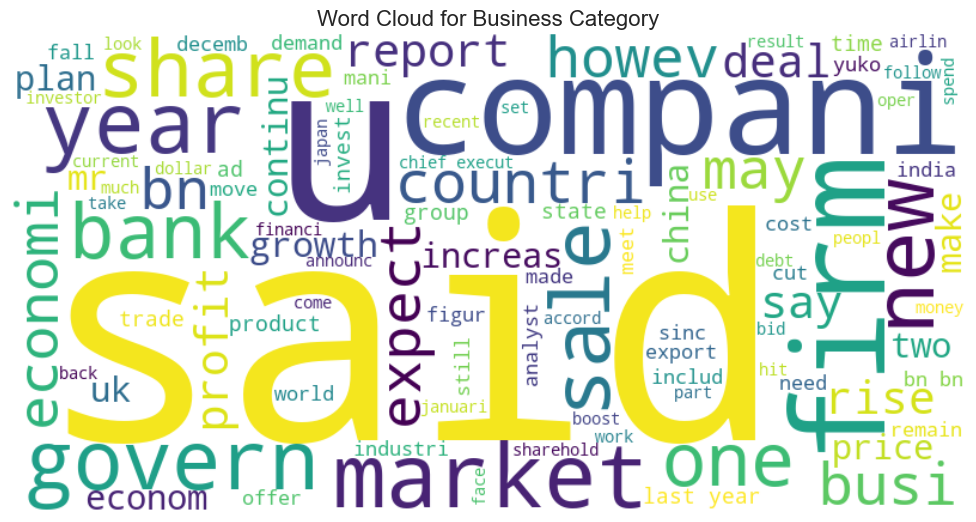


Top 20 words in 'entertainment' category:
[('film', 999), ('said', 825), ('year', 684), ('best', 619), ('music', 540), ('award', 533), ('star', 455), ('show', 426), ('also', 398), ('one', 385), ('us', 372), ('includ', 332), ('new', 323), ('last', 260), ('first', 256), ('actor', 252), ('band', 242), ('nomin', 240), ('top', 238), ('time', 235)]


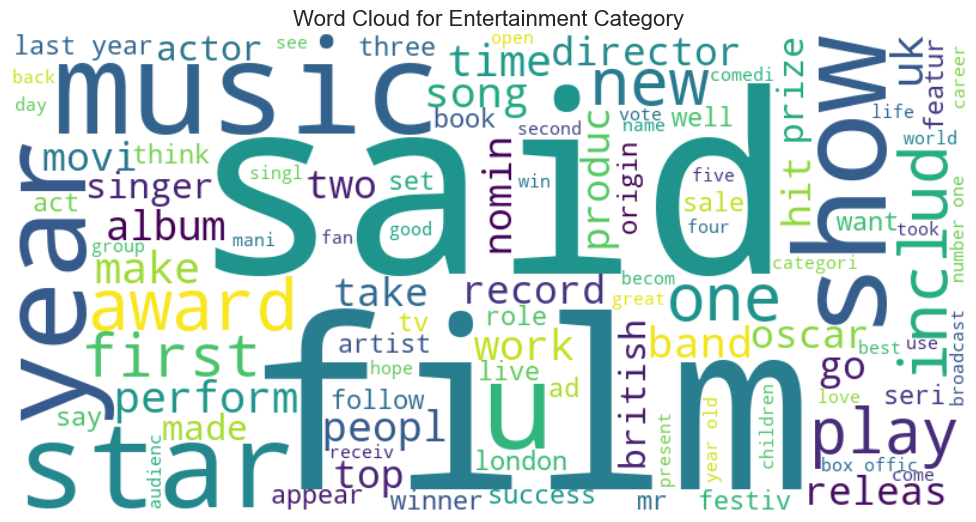


Top 20 words in 'politics' category:
[('said', 2241), ('mr', 1718), ('would', 1054), ('labour', 767), ('govern', 763), ('parti', 726), ('elect', 722), ('say', 654), ('peopl', 623), ('blair', 579), ('minist', 569), ('tori', 516), ('plan', 488), ('year', 469), ('also', 452), ('new', 430), ('brown', 390), ('could', 384), ('tax', 362), ('lord', 360)]


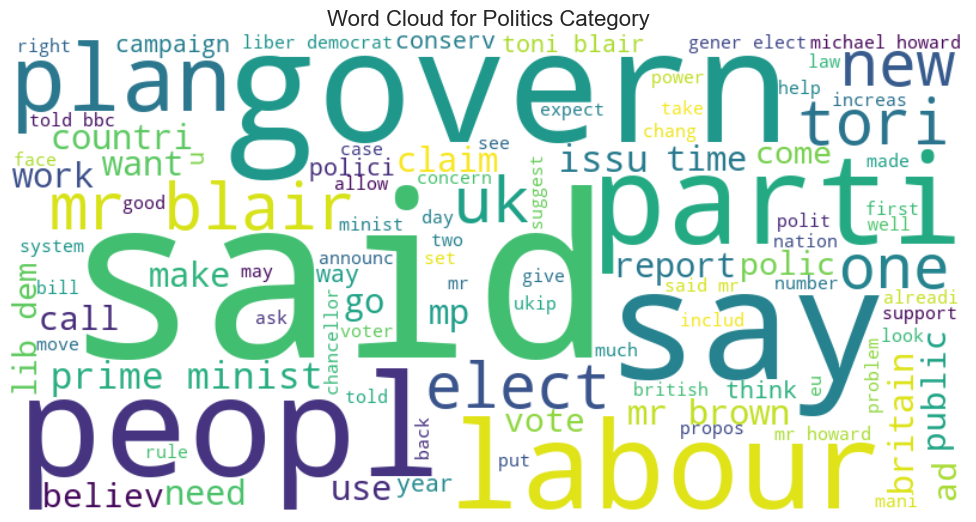


Top 20 words in 'sport' category:
[('said', 942), ('year', 671), ('game', 655), ('play', 629), ('win', 607), ('time', 492), ('first', 484), ('player', 479), ('england', 461), ('back', 416), ('would', 396), ('world', 395), ('two', 394), ('last', 390), ('one', 388), ('go', 373), ('final', 357), ('match', 357), ('team', 341), ('second', 338)]


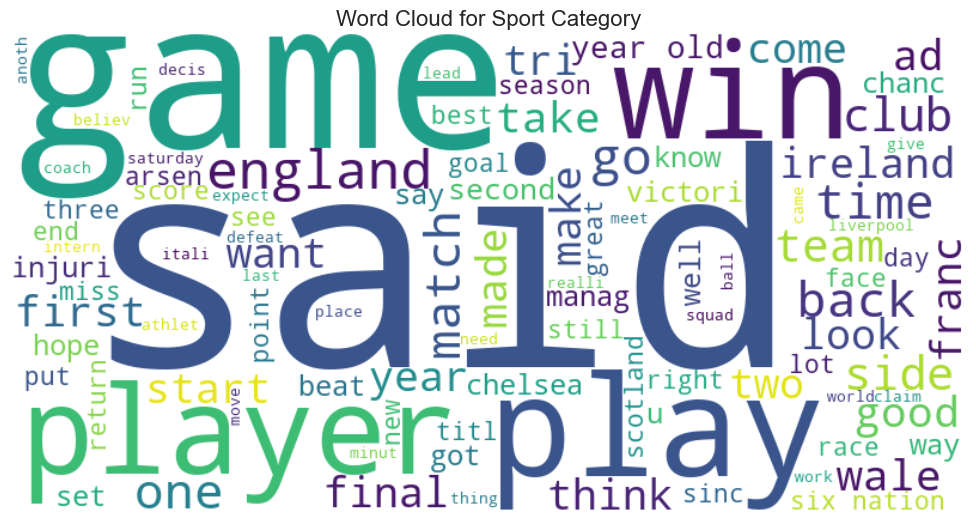


Top 20 words in 'tech' category:
[('said', 1567), ('use', 1014), ('peopl', 961), ('game', 889), ('technolog', 631), ('mobil', 622), ('one', 559), ('phone', 542), ('also', 537), ('year', 529), ('new', 517), ('servic', 515), ('mr', 510), ('user', 476), ('would', 471), ('could', 469), ('like', 468), ('make', 467), ('comput', 465), ('get', 438)]


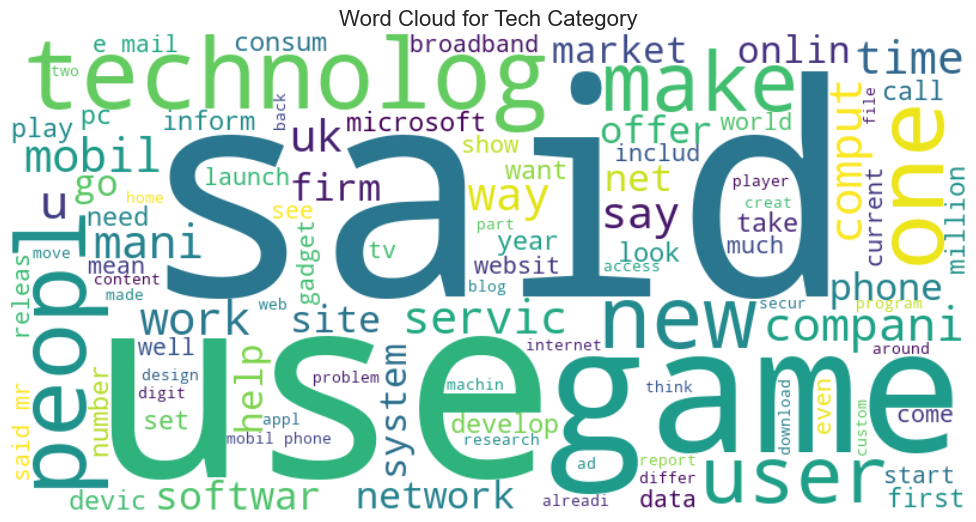

In [ ]:
print("\n--- Top Words by Category ---")
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

for category in bbc_df['category'].unique():
    category_texts = bbc_df[bbc_df['category'] == category]['normalized_text']
    top_words = get_top_words(category_texts)
    print(f"\nTop {len(top_words)} words in '{category}' category:")
    print(top_words)

    # word cloud for each category
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(' '.join(category_texts))

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category.capitalize()} Category', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## 7. Text Preprocessing Effectiveness


--- Text Preprocessing Effectiveness ---
Cleaning reduction percentage statistics:
count    2225.000000
mean        4.022683
std         1.536431
min         1.214058
25%         2.992194
50%         3.672075
75%         4.649138
max        13.646532
Name: cleaned_reduction, dtype: float64

Normalization reduction percentage statistics:
count    2225.000000
mean       39.379149
std         3.620665
min        21.258035
25%        37.186898
50%        39.340278
75%        41.612058
max        54.308943
Name: normalized_reduction, dtype: float64


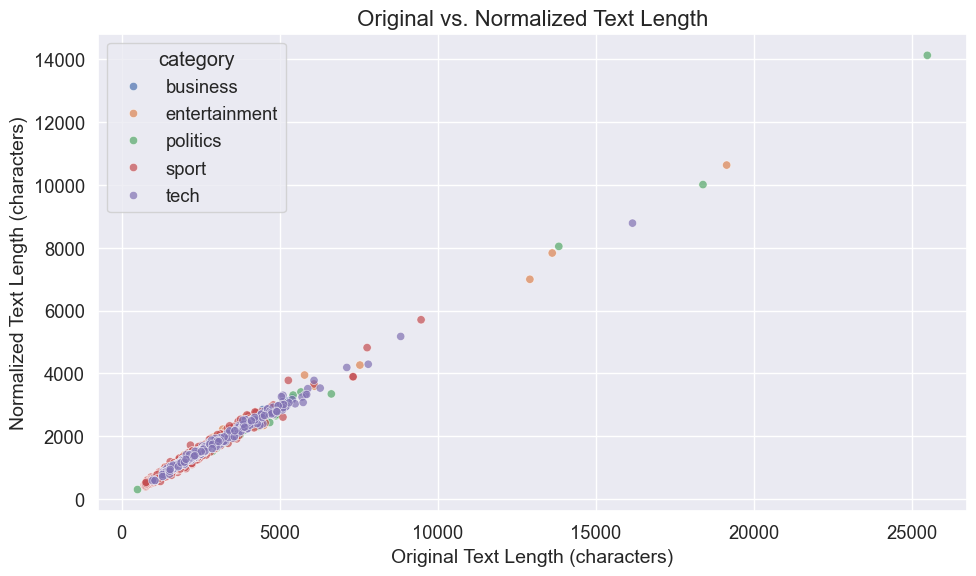

In [11]:
print("\n--- Text Preprocessing Effectiveness ---")
# Calculate reduction percentages
bbc_df['cleaned_reduction'] = (1 - bbc_df['cleaned_length'] / bbc_df['original_length']) * 100
bbc_df['normalized_reduction'] = (1 - bbc_df['normalized_length'] / bbc_df['original_length']) * 100

print("Cleaning reduction percentage statistics:")
print(bbc_df['cleaned_reduction'].describe())
print("\nNormalization reduction percentage statistics:")
print(bbc_df['normalized_reduction'].describe())

# scatter plot to show the correlation between original and normalized lengths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_length', y='normalized_length', hue='category', data=bbc_df, alpha=0.7)
plt.title('Original vs. Normalized Text Length', fontsize=16)
plt.xlabel('Original Text Length (characters)', fontsize=14)
plt.ylabel('Normalized Text Length (characters)', fontsize=14)
plt.tight_layout()
plt.savefig('original_vs_normalized_length.png')
plt.show()

## 8. Character-level analysis do we need this?

In [ ]:
print("\n--- Character-level Analysis ---")
def count_special_chars(text_series):
    special_chars = re.findall(r'[^\w\s]', ' '.join(text_series))
    return Counter(special_chars)

original_special_chars = count_special_chars(bbc_df['text'])
print("\nTop 20 special characters in original text:")
print(original_special_chars.most_common(20))


--- Character-level Analysis ---

Top 20 special characters in original text:
[('.', 43717), (',', 36583), ('"', 20423), ("'", 13742), ('-', 12943), (')', 2229), ('(', 2227), ('%', 1968), (':', 1695), ('£', 1403), ('$', 1240), ('?', 483), (';', 478), ('&', 236), ('/', 227), ('!', 198), ('[', 110), (']', 110), ('#', 30), ('+', 12)]


## 9. Dataset Balance Analysis

In [14]:
print("\n--- Dataset Balance Analysis ---")
# statistics by category
category_stats = bbc_df.groupby('category').agg({
    'original_length': ['mean', 'min', 'max', 'std'],
    'word_count_original': ['mean', 'min', 'max', 'std'],
    'normalized_length': ['mean', 'min', 'max', 'std'],
    'word_count_normalized': ['mean', 'min', 'max', 'std']
})

print("\nStatistics by category:")
category_stats


--- Dataset Balance Analysis ---

Statistics by category:


original_length                          word_count_original  \
                         mean  min    max          std                mean   
category                                                                     
business          1986.727451  848   5408   816.435526          328.880392   
entertainment     1928.593264  825  19138  1462.113142          330.621762   
politics          2684.088729  503  25485  1714.424493          453.973621   
sport             1897.317025  721   9473  1068.238613          329.262231   
tech              2976.359102  975  16160  1362.780889          502.695761   

                                     normalized_length              \
               min   max         std              mean  min    max   
category                                                             
business       140   891  135.919077       1218.415686  475   3217   
entertainment  143  3482  261.795254       1183.329016  500  10630   
politics        89  4432  300.120275       1589.011990  303  14123   
sport          114  1662  187.963267       1131.690802  396   5707   
tech           162  2969  239.849176       1779.438903  589   8782   

                          word_count_normalized                        
                      std                  mean min   max         std  
category                                                               
business       490.910108            193.364706  75   510   77.526295  
entertainment  826.243644            191.531088  83  1777  135.507283  
politics       957.503498            253.189448  48  2198  152.390393  
sport          642.764039            182.162427  62   930  103.901174  
tech           768.454274            286.458853  96  1465  125.494318

## 10. Summary

In [17]:
print("\n--- Summary ---")
print("""
Based on the dataset profiling:

1. The BBC dataset contains {} articles across {} categories: {}.
2. Average text length is {} characters before preprocessing and {} after normalization.
3. The average word count reduction through preprocessing is {:.2f}%.
4. The vocabulary size was reduced from {} to {} unique words after normalization.

""".format(
    len(bbc_df),
    len(bbc_df['category'].unique()),
    ', '.join(bbc_df['category'].unique()),
    int(bbc_df['original_length'].mean()),
    int(bbc_df['normalized_length'].mean()),
    bbc_df['normalized_reduction'].mean(),
    original_vocab_size,
    normalized_vocab_size
))



--- Summary ---

Based on the dataset profiling:

1. The BBC dataset contains 2225 articles across 5 categories: business, entertainment, politics, sport, tech.
2. Average text length is 2265 characters before preprocessing and 1362 after normalization.
3. The average word count reduction through preprocessing is 39.38%.
4. The vocabulary size was reduced from 65553 to 18997 unique words after normalization.




Recommendations for further analysis:
1. Consider using TF-IDF or word embeddings to capture the semantic meaning of texts.
4. Consider dimensionality reduction techniques to visualize document similarity.